# Trueskill

How does trueskill converge over the finals?

In [1]:
from viz import load_all_games
from viz import score_with_default_trueskill 
from viz import plot_players 
import trueskill

import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline  

In [2]:
games = load_all_games() # Takes a minute

In [3]:
trueskill.setup(tau=0.08333333333333334)
players = score_with_default_trueskill(games) # Takes a few minutes

Loading Games
5000 of 86982
10000 of 86982
15000 of 86982
20000 of 86982
25000 of 86982
30000 of 86982
35000 of 86982
40000 of 86982
45000 of 86982
50000 of 86982
55000 of 86982
60000 of 86982
65000 of 86982
70000 of 86982
75000 of 86982
80000 of 86982
85000 of 86982
Done


In [4]:
trueskill.setup(tau=0.02)
triple_games = games + games + games
players_triple_games_low_tau = score_with_default_trueskill(triple_games) # Takes a long time

Loading Games
5000 of 260946
10000 of 260946
15000 of 260946
20000 of 260946
25000 of 260946
30000 of 260946
35000 of 260946
40000 of 260946
45000 of 260946
50000 of 260946
55000 of 260946
60000 of 260946
65000 of 260946
70000 of 260946
75000 of 260946
80000 of 260946
85000 of 260946
90000 of 260946
95000 of 260946
100000 of 260946
105000 of 260946
110000 of 260946
115000 of 260946
120000 of 260946
125000 of 260946
130000 of 260946
135000 of 260946
140000 of 260946
145000 of 260946
150000 of 260946
155000 of 260946
160000 of 260946
165000 of 260946
170000 of 260946
175000 of 260946
180000 of 260946
185000 of 260946
190000 of 260946
195000 of 260946
200000 of 260946
205000 of 260946
210000 of 260946
215000 of 260946
220000 of 260946
225000 of 260946
230000 of 260946
235000 of 260946
240000 of 260946
245000 of 260946
250000 of 260946
255000 of 260946
260000 of 260946
Done


In [5]:
trueskill.setup(tau=0.02)
players_low_tau = score_with_default_trueskill(games) # Takes a few minutes

Loading Games
5000 of 86982
10000 of 86982
15000 of 86982
20000 of 86982
25000 of 86982
30000 of 86982
35000 of 86982
40000 of 86982
45000 of 86982
50000 of 86982
55000 of 86982
60000 of 86982
65000 of 86982
70000 of 86982
75000 of 86982
80000 of 86982
85000 of 86982
Done


In [6]:
trueskill.setup(tau=0.01)
players_low_low_tau = score_with_default_trueskill(games) # Takes a few minutes

Loading Games
5000 of 86982
10000 of 86982
15000 of 86982
20000 of 86982
25000 of 86982
30000 of 86982
35000 of 86982
40000 of 86982
45000 of 86982
50000 of 86982
55000 of 86982
60000 of 86982
65000 of 86982
70000 of 86982
75000 of 86982
80000 of 86982
85000 of 86982
Done


In [7]:
trueskill.setup(tau=0.02)
players_topbottom = score_with_default_trueskill(games, style="topbottom-trueskill") # Takes a few minutes

Loading Games
5000 of 86982
10000 of 86982
15000 of 86982
20000 of 86982
25000 of 86982
30000 of 86982
35000 of 86982
40000 of 86982
45000 of 86982
50000 of 86982
55000 of 86982
60000 of 86982
65000 of 86982
70000 of 86982
75000 of 86982
80000 of 86982
85000 of 86982
Done


In [8]:
players["mzotkiew"].rating_data[-1]

PlayerData(timestamp=u'2017-02-16 17:20:05', game_number=415, mu=54.590127785677325, sigma=0.7345653085547454)

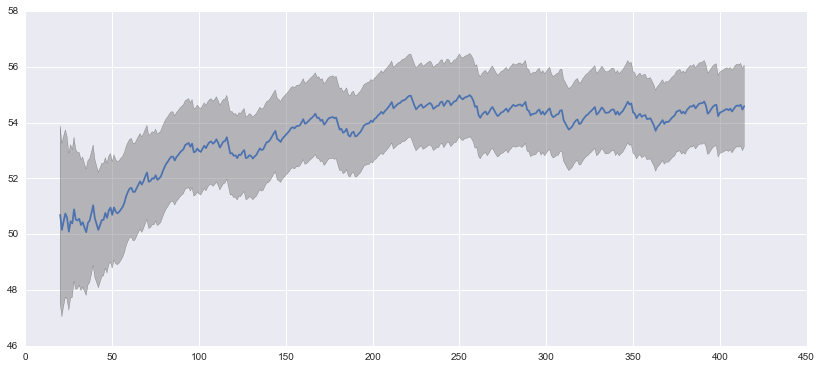

In [9]:
def plot_converge(player):
    player_mus = []
    player_sigmas = []
    player_dates = []
    for r_data in player.rating_data[20:]:
        player_mus.append(r_data.mu)
        player_sigmas.append(r_data.sigma)
        player_dates.append(datetime.datetime.strptime(r_data.timestamp,'%Y-%m-%d %H:%M:%S'))

    player_mus = np.array(player_mus)
    player_sigmas = np.array(player_sigmas)
    dates = matplotlib.dates.date2num(player_dates)

    sns.set_style("darkgrid")
    plt.rcParams["figure.figsize"] = [14.0, 6.0]
    plt.fill_between(range(20, len(player.rating_data)), player_mus+player_sigmas*2, player_mus-player_sigmas*2, facecolor='grey', alpha=0.5)
    plt.plot(range(20, len(player.rating_data)), player_mus)
    plt.show()
    
#     plt.fill_between(range(20, len(player.rating_data)), player_sigmas, facecolor='grey')
#     plt.ylim((0,1))
#     plt.show()
    
    
plot_converge(players["mzotkiew"])

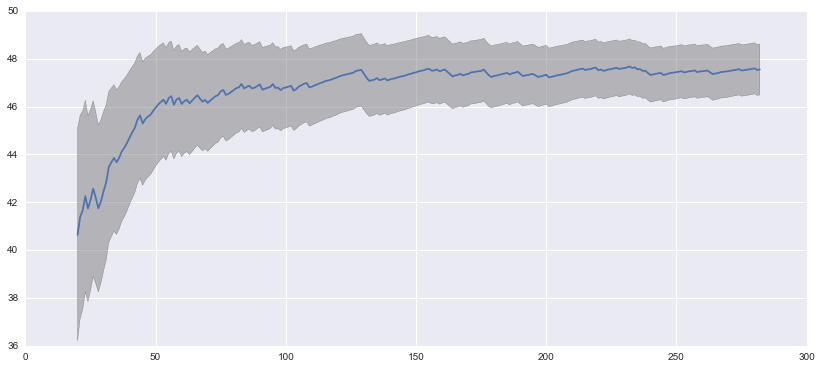

In [10]:
plot_converge(players_topbottom["mzotkiew"])

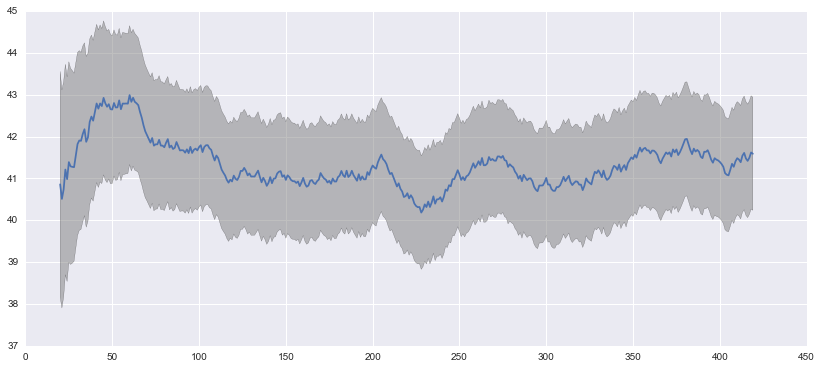

In [11]:
plot_converge(players["DanielVF"])

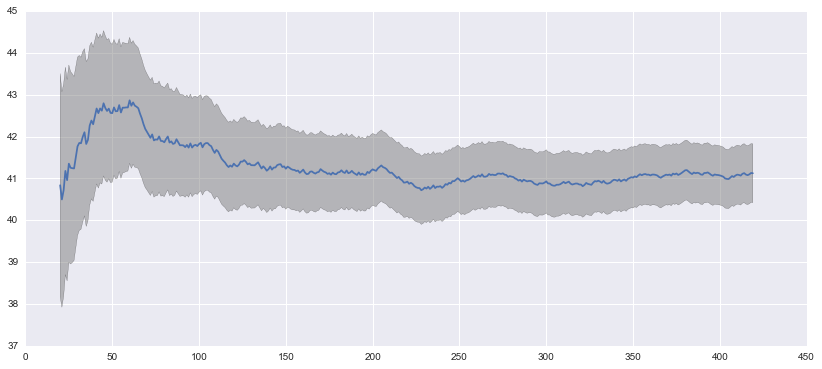

In [12]:
plot_converge(players_low_tau["DanielVF"])

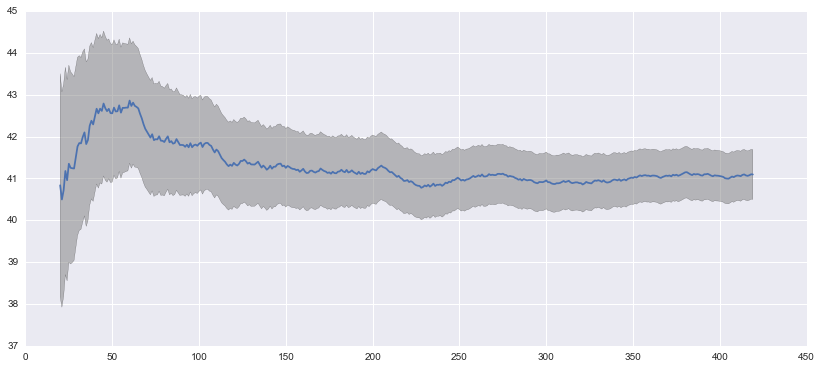

In [13]:
plot_converge(players_low_low_tau["DanielVF"])

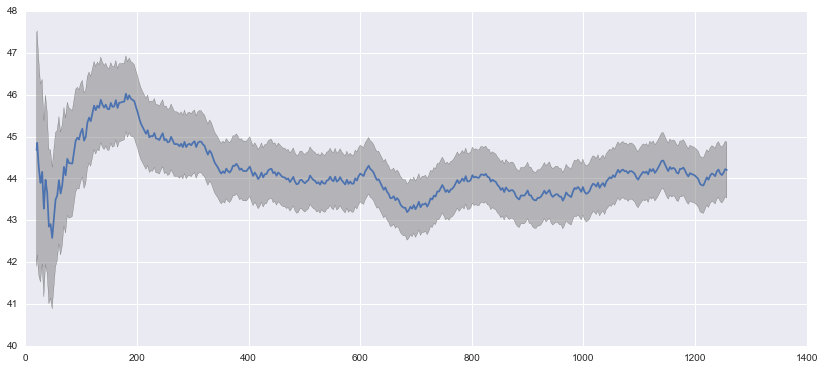

In [14]:
plot_converge(players_triple_games_low_tau["DanielVF"])

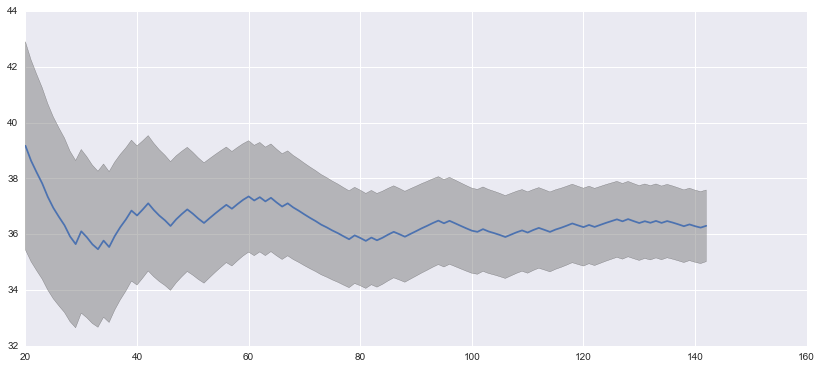

In [15]:
plot_converge(players_topbottom["DanielVF"])

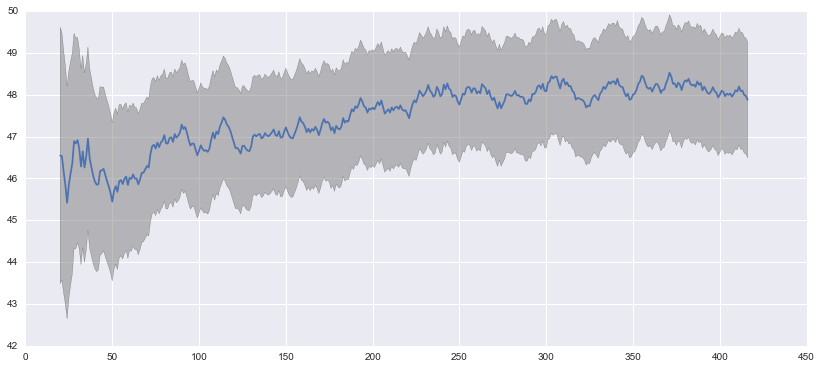

In [16]:
plot_converge(players["nmalaguti"])

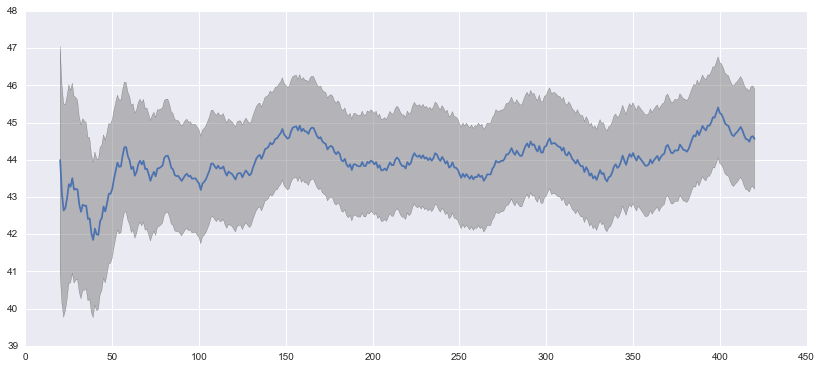

In [17]:
plot_converge(players["tmseiler"])

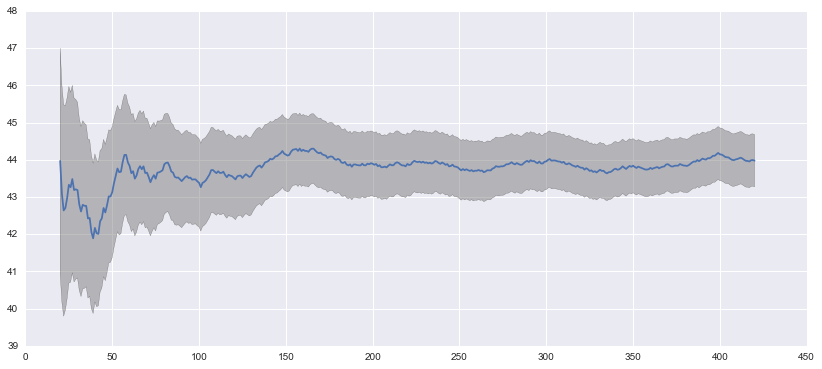

In [18]:
plot_converge(players_low_tau["tmseiler"])

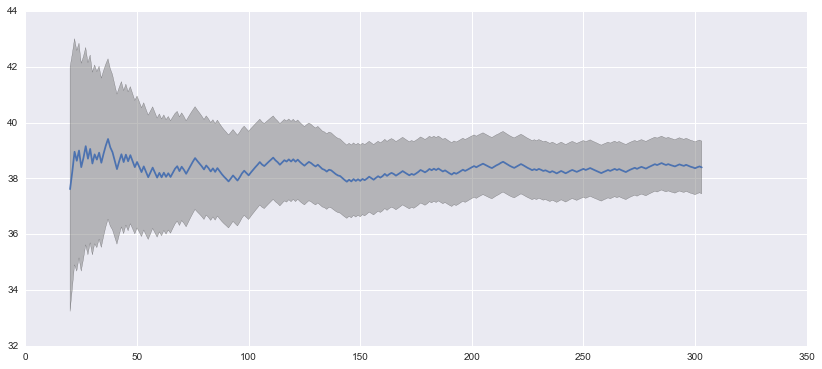

In [19]:
plot_converge(players_topbottom["tmseiler"])

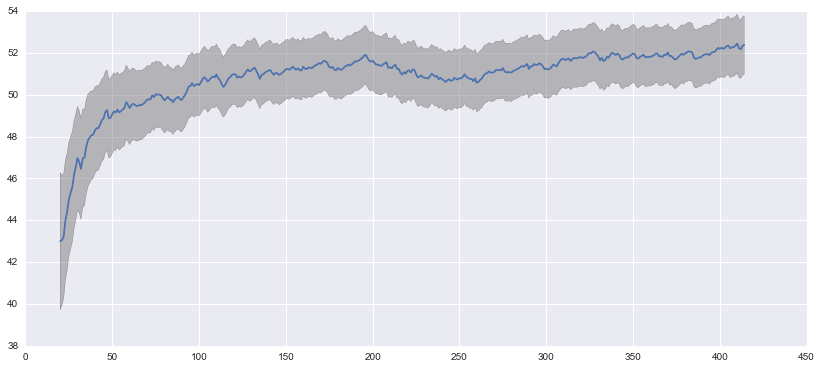

In [20]:
plot_converge(players["shummie"])

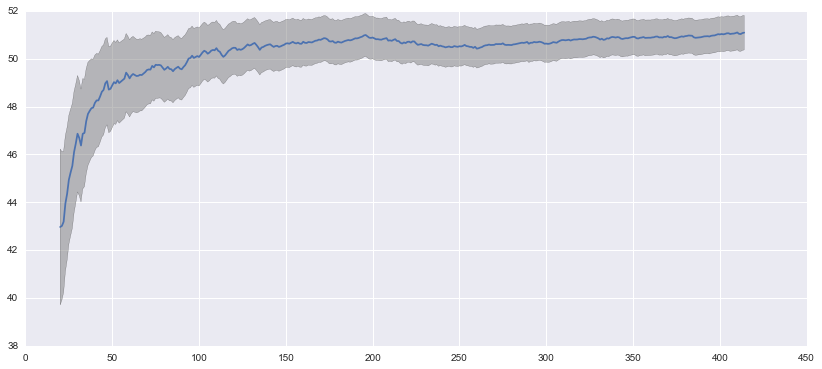

In [21]:
plot_converge(players_low_tau["shummie"])

In [22]:
def leaderboard(players, num_players=10):
    ranked_players = []
    
    for username, player in players.iteritems():
        ranked_players.append([username, player.rating_data[-1].mu, player.rating_data[-1].sigma])
       
    ranked_players.sort(key=lambda x: 0-x[1])
    
    return ranked_players[0: num_players]

leaderboard(players)

[[u'mzotkiew', 54.590127785677325, 0.7345653085547454],
 [u'shummie', 52.38560752231952, 0.6959220596902155],
 [u'erdman', 51.24849120897741, 0.6894000090288978],
 [u'timfoden', 50.54770072794961, 0.6997793574475768],
 [u'cdurbin', 49.51591346022256, 0.6894477059235852],
 [u'nmalaguti', 47.87890119610136, 0.6918318452819042],
 [u'PeppiKokki', 47.2208607818646, 0.6888072976283892],
 [u'DexGroves', 46.79288534940999, 0.7097949906932476],
 [u'ewirkerman', 46.345809575487046, 0.6832126493117404],
 [u'moonbirth', 46.029670691770285, 0.6844305932766706]]

In [23]:
leaderboard(players_low_tau)

[[u'mzotkiew', 53.675107175102795, 0.38634244627412617],
 [u'shummie', 51.09579511904125, 0.36110321462212625],
 [u'erdman', 50.657619056459296, 0.36270201085614306],
 [u'timfoden', 49.66923741466678, 0.36166077154456483],
 [u'cdurbin', 48.434500844839775, 0.35596104432461523],
 [u'nmalaguti', 47.32864769577202, 0.3595261225720537],
 [u'PeppiKokki', 46.65615163518941, 0.359284432604328],
 [u'DexGroves', 46.34357853862097, 0.36553556255465386],
 [u'ewirkerman', 45.84779257715674, 0.356231987119903],
 [u'moonbirth', 45.12786141048682, 0.35617896324796405]]

In [24]:
leaderboard(players_triple_games_low_tau)

[[u'mzotkiew', 57.72995594067725, 0.3600769394759587],
 [u'shummie', 55.406947224485485, 0.3410258112956895],
 [u'erdman', 54.45317171740672, 0.3389948831538501],
 [u'timfoden', 53.696749863190746, 0.34274768683758644],
 [u'cdurbin', 52.6991389915713, 0.33753245290526895],
 [u'nmalaguti', 51.163076743417946, 0.3393737054298456],
 [u'PeppiKokki', 50.37494702848912, 0.3384841843092389],
 [u'DexGroves', 49.996309854060755, 0.3479008185170232],
 [u'ewirkerman', 49.521296762408696, 0.33587044692727575],
 [u'moonbirth', 49.03140921598254, 0.3361314904458768]]

In [25]:
leaderboard(players_topbottom)

[[u'mzotkiew', 47.557945851069924, 0.5322064512529594],
 [u'erdman', 46.52086192092187, 0.6482084067458216],
 [u'shummie', 45.017612640197655, 0.6288124096829049],
 [u'timfoden', 43.3254589849497, 0.44580666323820345],
 [u'nmalaguti', 41.851746707377494, 0.6331926903798447],
 [u'cdurbin', 41.308844501368796, 0.5563345586089379],
 [u'acouette', 41.2958857175891, 0.5878821253636204],
 [u'KalraA v92', 40.616810079918835, 0.5968153522196724],
 [u'PeppiKokki', 40.49014610011856, 0.4818390316692976],
 [u'ewirkerman', 40.29221880960397, 0.4623619735785631]]

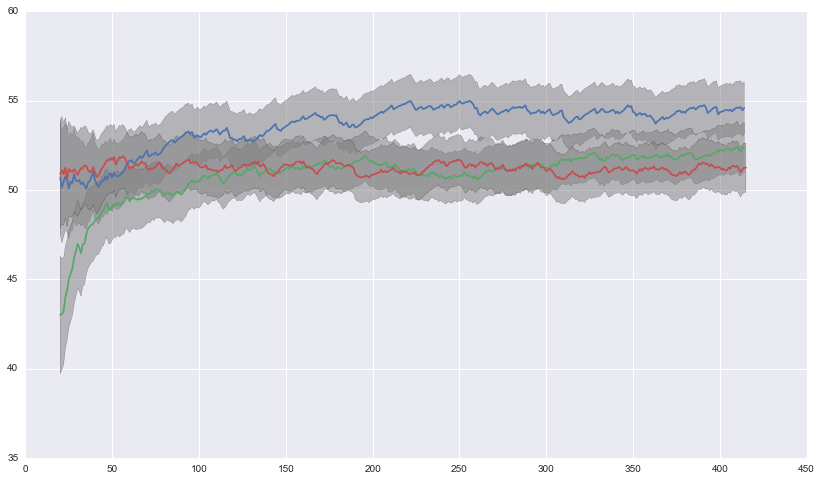

In [26]:
def plot_compare(players, player_names, ysize=8.0, starting_game=20):
    for name in player_names:
        player = players[name]
        player_mus = []
        player_sigmas = []
        player_dates = []
        for r_data in player.rating_data[starting_game:]:
            player_mus.append(r_data.mu)
            player_sigmas.append(r_data.sigma)
            player_dates.append(datetime.datetime.strptime(r_data.timestamp,'%Y-%m-%d %H:%M:%S'))

        player_mus = np.array(player_mus)
        player_sigmas = np.array(player_sigmas)
        dates = matplotlib.dates.date2num(player_dates)

        sns.set_style("darkgrid")
        plt.rcParams["figure.figsize"] = [14.0, ysize]
        plt.fill_between(range(starting_game, len(player.rating_data)), player_mus+player_sigmas*2, player_mus-player_sigmas*2, facecolor='grey', alpha=0.5,)
        plt.plot(range(starting_game, len(player.rating_data)), player_mus)
    plt.show()
    
    
plot_compare(players,["mzotkiew","shummie","erdman"])

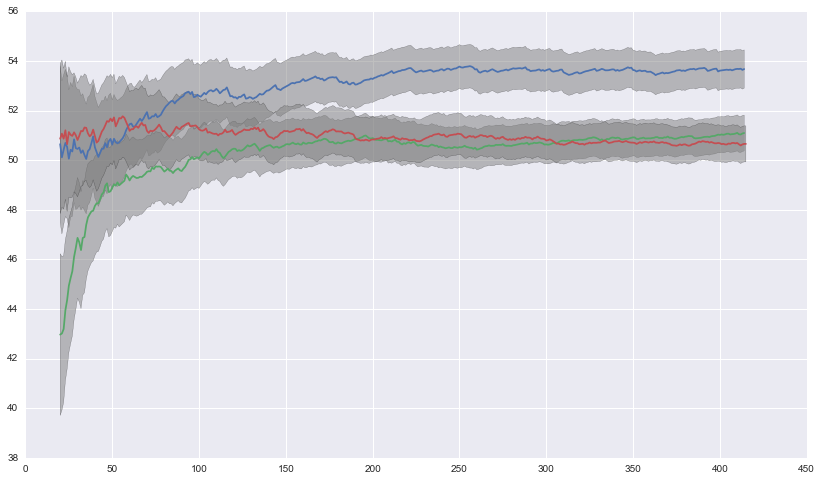

In [27]:
plot_compare(players_low_tau,["mzotkiew","shummie","erdman"])

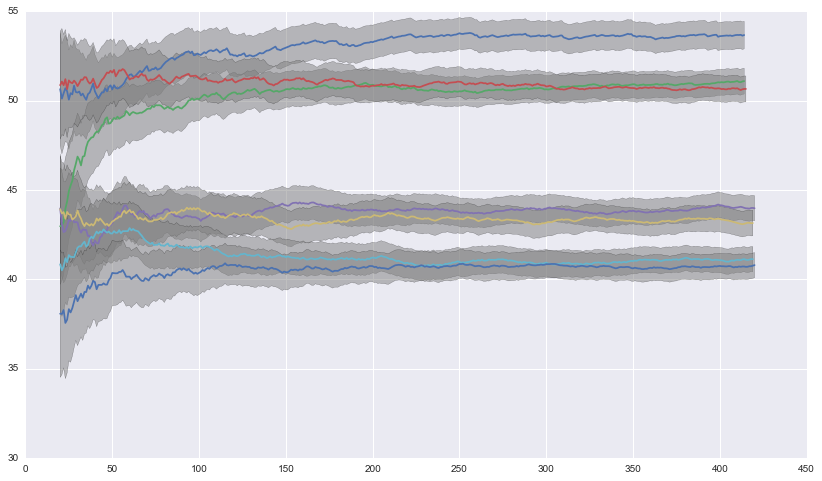

In [28]:
plot_compare(players_low_tau,["mzotkiew","shummie","erdman",  "tmseiler", "djma", "DanielVF", "Sydriax"])

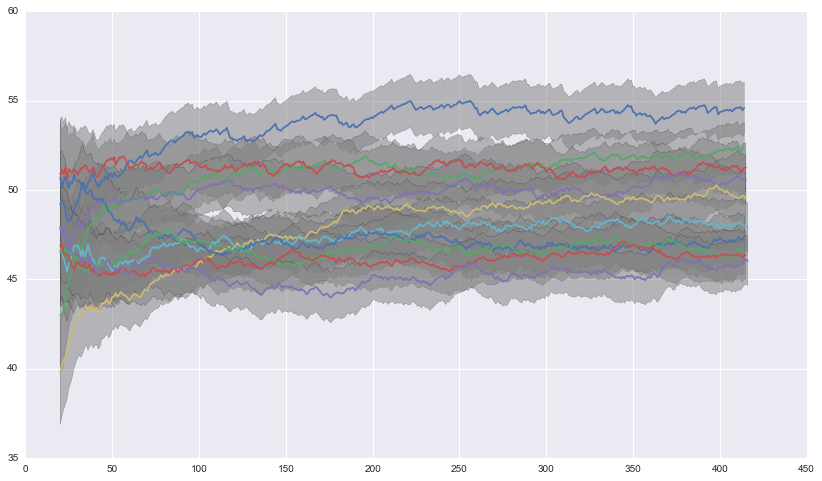

In [29]:
plot_compare(players, [x[0] for x in leaderboard(players)])

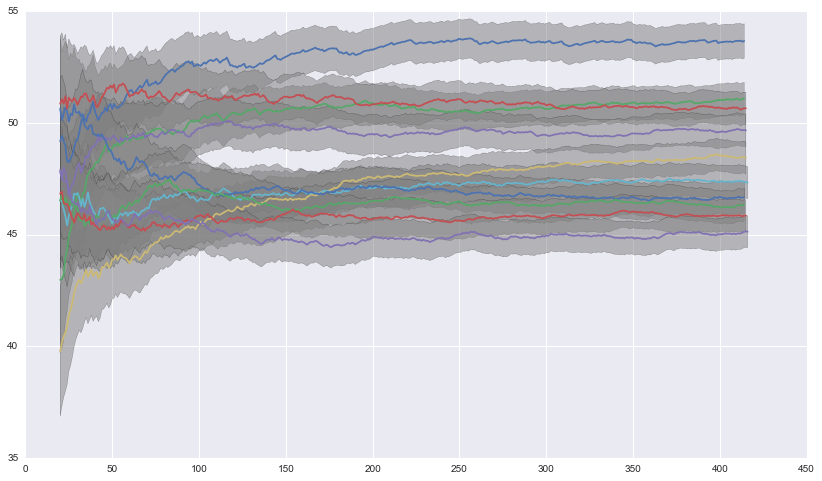

In [30]:
plot_compare(players_low_tau, [x[0] for x in leaderboard(players_low_tau)])

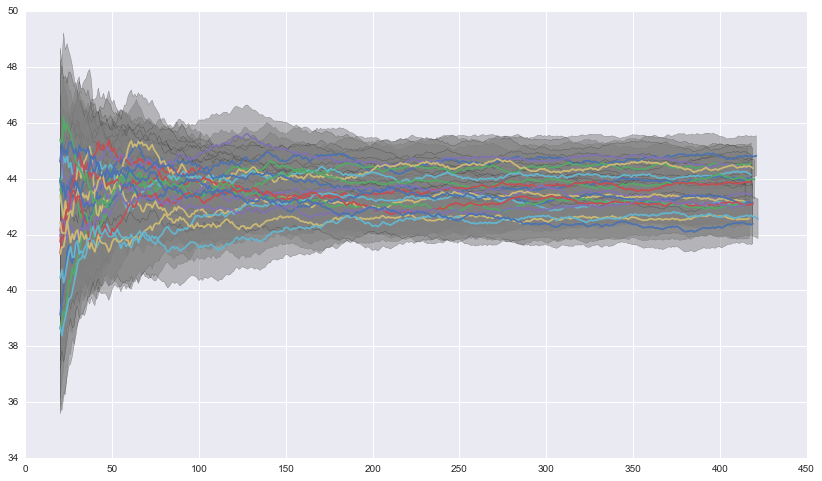

In [31]:
plot_compare(players_low_tau, [x[0] for x in leaderboard(players_low_tau, 30)][10:-1])

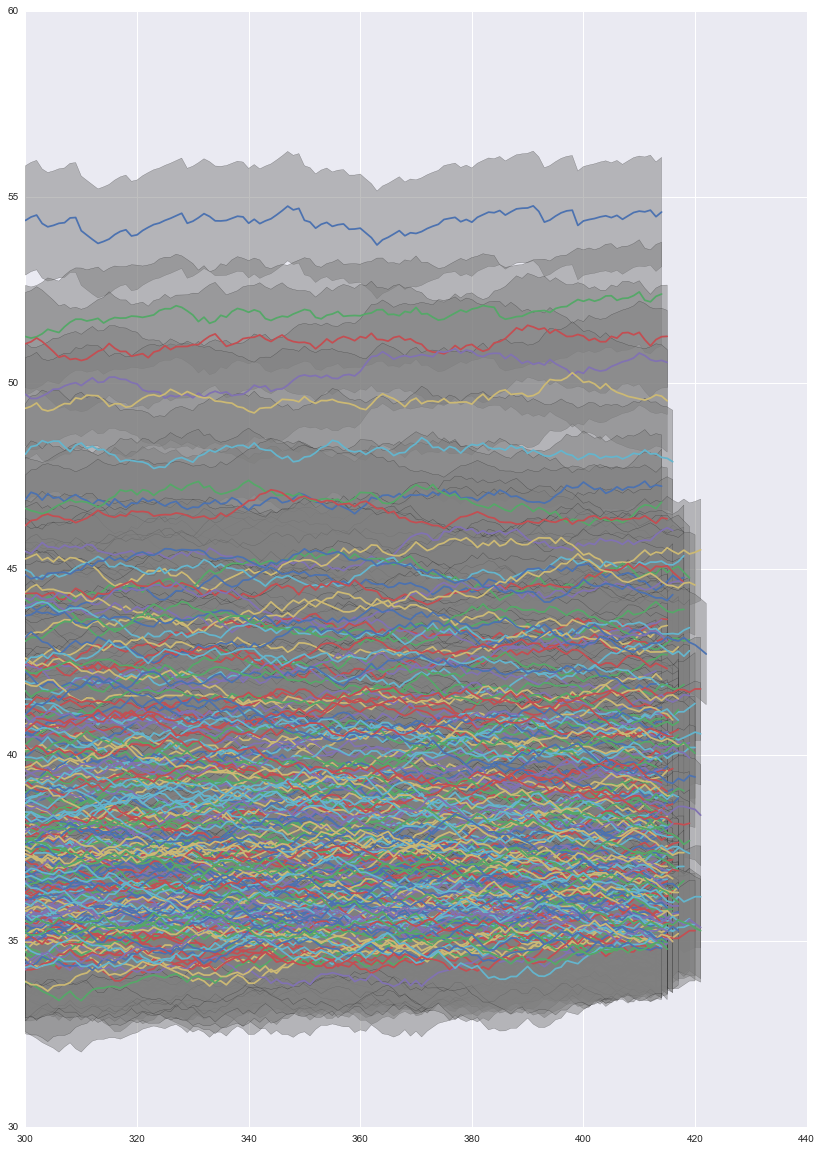

In [32]:
plot_compare(players, [x[0] for x in leaderboard(players, 200)], ysize=20, starting_game=300)

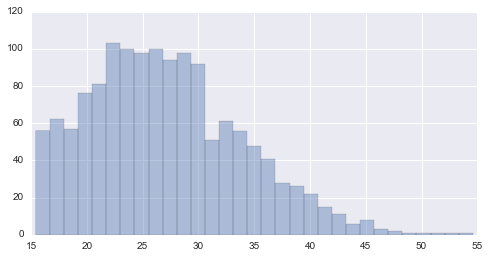

In [33]:
sns.set(rc={"figure.figsize": (8, 4)});
sns.distplot([x[1] for x in leaderboard(players, 1400)], bins=31, kde=False)

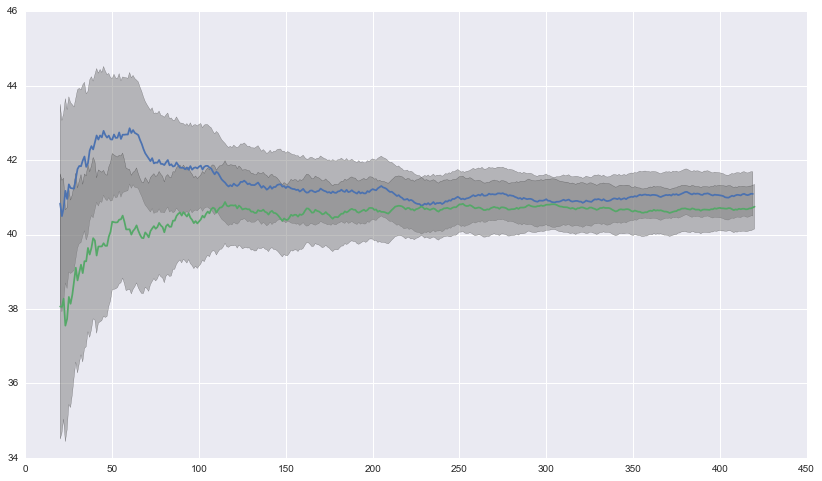

In [34]:
plot_compare(players_low_low_tau,["DanielVF", "Sydriax"])

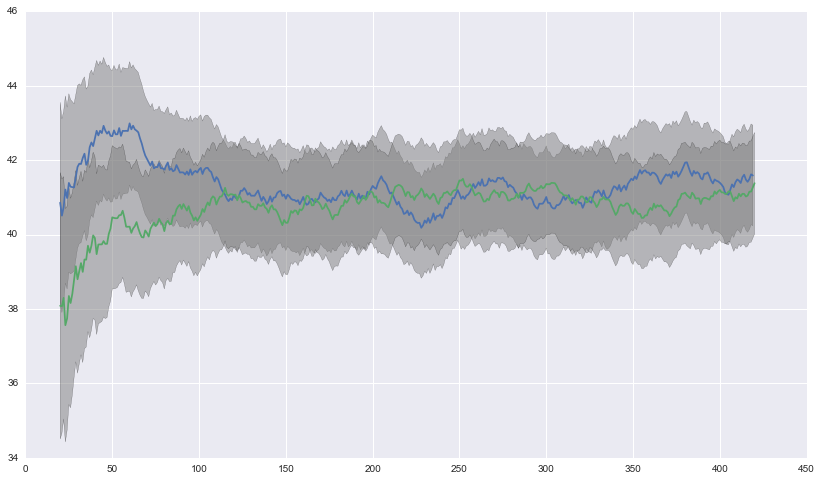

In [35]:
plot_compare(players,["DanielVF", "Sydriax"])